# رفتار مناسبی دیده نشد

# Classification Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
#filename = #import model approch for  joblib

### PreProcess


In [3]:
X_train = pd.read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Training_Data')
X_test = pd .read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Test_Data')


#### Clean and Engeering Data

In [4]:
X_test=X_test.drop(['Attribute Information:'],axis=1)

In [5]:
y_train = X_train[' UNS']
X_train = X_train.drop([' UNS'], axis=1)

In [6]:

y_test = X_test[' UNS']
X_test =X_test.drop([' UNS','Unnamed: 6','Unnamed: 7'],axis=1)

In [7]:
X_train.info()

X_train

#OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
dtypes: float64(5)
memory usage: 10.2 KB


,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58
254,0.78,0.61,0.71,0.19,0.60
255,0.54,0.82,0.71,0.29,0.77
256,0.50,0.75,0.81,0.61,0.26


In [8]:
X_test.info()


#OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     145 non-null    float64
 1   SCG     145 non-null    float64
 2   STR     145 non-null    float64
 3   LPR     145 non-null    float64
 4   PEG     145 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


In [9]:
y_test.value_counts()

 UNS
Low         46
High        39
Middle      34
Very Low    26
Name: count, dtype: int64

In [10]:
y_train.value_counts()

 UNS
Middle      88
Low         83
High        63
very_low    24
Name: count, dtype: int64

In [11]:
y_train.value_counts()

#need to map
vTs={
    'Very Low':0,
    'very_low':0,
    'Low':1,
    'Middle':2,
    'High':3
}
y_train = y_train.map(vTs)

In [12]:
y_test.value_counts()

#need map
y_test = y_test.map(vTs)

### Model
#### Grad

In [13]:
grad =GradientBoostingClassifier()

In [37]:
pipe_grad = Pipeline([('grad',grad)])

In [15]:
help(grad)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regressio

In [16]:
#hyper params Values
loss = ['log_loss', 'exponential']
learning_rate = list(np.logspace(-4,-1,3))
n_estimators = list(range(50,150,10))
criterion =['friedman_mse', 'squared_error']
max_depth = [1,3,5]
max_features = [ 'sqrt', 'log2', None]

In [17]:
hyp_param ={
    'grad__loss': loss,
    'grad__learning_rate' : learning_rate,
    'grad__n_estimators' : n_estimators,
    'grad__criterion' : criterion,
    'grad__max_depth' : max_depth,
    'grad__max_features' : max_features,   
}

#### Create Model(s)

In [35]:
full_model_grad = GridSearchCV(estimator=pipe_grad,verbose=2)

TypeError: GridSearchCV.__init__() missing 1 required positional argument: 'param_grid'

In [19]:
full_model_grad.fit(X_train,y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50; total time=   0.2s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50; total time=   0.1s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50; total time=   0.1s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50; total time=   0.1s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50; total time=   0.2s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2700 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_gb.py", line 444, in fit
    self._check_params()
  File "/opt/conda/lib/python3.11/site-package

GridSearchCV(estimator=Pipeline(steps=[('grad', GradientBoostingClassifier())]),
             param_grid={'grad__criterion': ['friedman_mse', 'squared_error'],
                         'grad__learning_rate': [0.0001, 0.0031622776601683794,
                                                 0.1],
                         'grad__loss': ['log_loss', 'exponential'],
                         'grad__max_depth': [1, 3, 5],
                         'grad__max_features': ['sqrt', 'log2', None],
                         'grad__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                120, 130, 140]},
             verbose=2)

In [38]:
pipe_grad.fit(X_train,y_train)

Pipeline(steps=[('grad', GradientBoostingClassifier())])

#### Train Model

In [39]:
y_pred_grad = full_model_grad.predict(X_test)

#### Test On data

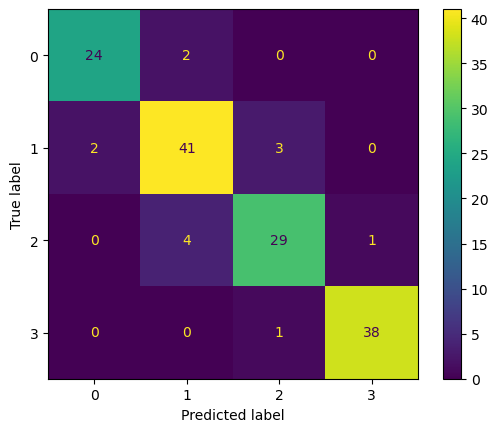

In [40]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred_grad)
                       ,display_labels=full_model_grad.classes_).plot()

In [41]:
print( classification_report(y_pred=y_pred_grad,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.87      0.89      0.88        46
           2       0.88      0.85      0.87        34
           3       0.97      0.97      0.97        39

    accuracy                           0.91       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.91      0.91      0.91       145



In [45]:
pipe_grad.get_params()

{'memory': None,
 'steps': [('grad', GradientBoostingClassifier())],
 'verbose': False,
 'grad': GradientBoostingClassifier(),
 'grad__ccp_alpha': 0.0,
 'grad__criterion': 'friedman_mse',
 'grad__init': None,
 'grad__learning_rate': 0.1,
 'grad__loss': 'log_loss',
 'grad__max_depth': 3,
 'grad__max_features': None,
 'grad__max_leaf_nodes': None,
 'grad__min_impurity_decrease': 0.0,
 'grad__min_samples_leaf': 1,
 'grad__min_samples_split': 2,
 'grad__min_weight_fraction_leaf': 0.0,
 'grad__n_estimators': 100,
 'grad__n_iter_no_change': None,
 'grad__random_state': None,
 'grad__subsample': 1.0,
 'grad__tol': 0.0001,
 'grad__validation_fraction': 0.1,
 'grad__verbose': 0,
 'grad__warm_start': False}

#### Train on all data

X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

final_model = SVC(decision_function_shape='ovo',degree=2,gamma='scale',kernel='poly')
final_model.fit(X,y)

gradBoost_final_model = GradientBoostingClassifier(
    criterion='friedman_mse',
    learning_rate=0.01778279410038923,
    loss='log_loss',
    max_depth= 1,
    max_features='sqrt',
    n_estimators= 130
)

gradBoost_final_model.fit(X,y)

#### Save with joblib

import joblib
joblib.dump(value=gradBoost_final_model,filename=filename1)

# Congratulations!!!

#### Created and trained by  Matin1099.


### Model
#### ADA

#### Create Model(s)

In [24]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample

In [25]:
ada = AdaBoostClassifier()

In [46]:
pipe_ada = Pipeline([('ada',ada)])

In [27]:
#hyper params Values
algorithm = ['SAMME', 'SAMME.R']
learning_rate = list(np.logspace(-4,-1,5))
n_estimators = list(range(50,150,10))

In [28]:
hyp_param ={
    'ada__algorithm': algorithm,
    'ada__learning_rate' : learning_rate,
    'ada__n_estimators' : n_estimators,
}

In [29]:
full_model_ada = GridSearchCV(estimator=pipe_ada,param_grid=hyp_param,verbose=1)

#### Train Model

In [30]:
full_model_ada.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Pipeline(steps=[('ada', AdaBoostClassifier())]),
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.0001, 0.0005623413251903491,
                                                0.0031622776601683794,
                                                0.01778279410038923, 0.1],
                         'ada__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                               120, 130, 140]},
             verbose=1)

In [47]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('ada', AdaBoostClassifier())])

### Evaluate model

In [48]:
y_pred_ada = full_model_ada.predict(X_test)

#### Test On data

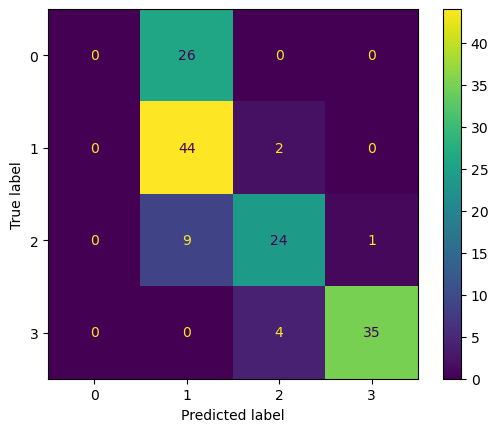

In [49]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred_ada)
                       ,display_labels=full_model_ada.classes_).plot()

In [50]:
print(classification_report(y_pred=y_pred_ada,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.56      0.96      0.70        46
           2       0.80      0.71      0.75        34
           3       0.97      0.90      0.93        39

    accuracy                           0.71       145
   macro avg       0.58      0.64      0.60       145
weighted avg       0.63      0.71      0.65       145



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
full_model_ada.best_params_

### Final Model(s)


#### Train on all Data 

ada_final_model = AdaBoostClassifier(
    algorithm='SAMME',
    learning_rate=0.1,
    n_estimators=60)

X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

final_model = SVC(decision_function_shape='ovo',degree=2,gamma='scale',kernel='poly')
final_model.fit(X,y)

ada_final_model.fit(X,y)

#### Save with joblib

import joblib
joblib.dump(value=ada_final_model,filename='adaBoost.pkl')

# Congratulations!!!

#### Created and trained by  Matin1099.
